# *Chapter 7: Animating graphs*

## Context: travelling waves

The wave equation for a traveling wave can be represented as

$$ u(x, t) = A \cos(kx - \omega t ) $$

where:

- $u(x, t)$ is the displacement of strength of the wave at position $x$ and time $t$,
- $A$ is the amplitude (maximum displacment or strength) of the wave,
- $\omega = 2\pi f$ is the angular frequency, where the frequency is related to the wavespeed $v$ and wavelength $\lambda$ as $f= v/\lambda$.
- $k = 2\pi/\lambda = \omega /v$ is the wave number.


In the context of **radiowaves**, $u(x,t)$ typically represents the electric field strength (in Volts) of the radiowave.

The code below plots:

(i) $u$ as a function of $t$ (by setting $x = 0$). This represents the radio wave strength over time at a particular point in space,

(ii) $u$ as a function of $x$ (by setting $t = 0$). This represents the radio wave strength over space at a particular point in time,

for a set of typical values: $A= 1$ V, $f = 1$ MHz, $v = 3 \times 10^8$ m/s.

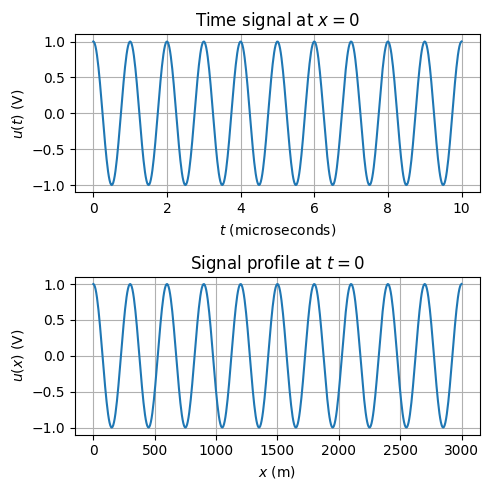

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
A = 1  # amplitude in volts
f = 1e6  # frequency in Hz (1 MHz)
v = 3e8  # speed of the wave in m/s

# Derived parameters
omega = 2 * np.pi * f  # angular frequency
wavelength = v/f
k = 2 * np.pi / wavelength  # wave number

# Time plot parameters
t = np.linspace(0, 10e-6, 500)  # time from 0 to 10 microseconds

# Space plot parameters
x = np.linspace(0, 3e3, 500)  # distance from 0 to 3 km meters

# Wave equations
u_t = A * np.cos(-omega * t)  # at x = 0
u_x = A * np.cos(k * x)  # at t = 0

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(5, 5))

# Plot u as a function of t
axs[0].plot(t*1e6, u_t)
axs[0].set_title('Time signal at $x = 0$')
axs[0].set_xlabel('$t$ (microseconds)')
axs[0].set_ylabel('$u(t)$ (V)')
axs[0].grid(True)

# Plot u as a function of x
axs[1].plot(x, u_x)
axs[1].set_title('Signal profile at $t = 0$')
axs[1].set_xlabel('$x$ (m)')
axs[1].set_ylabel('$u(x)$ (V)')
axs[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

## Exercise 1: Travelling radiowave

For the values $A= 1$ V, $f = 1$ MHz, $v = 3 \times 10^8$ m/s, plot the wave

$$ u(x, t) = A \cos(kx - \omega t )$$

as a function of $x$, for $0\leq x \leq 1000$ m for three instances of time:

(i) $t=0$

(ii) $t=0.1$ $\mu$s

(iii) $t=0.2$ $\mu$s





#### Answer

#### Solution

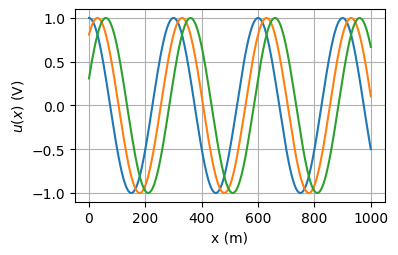

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def wave(A,f,v,t, x):
  # Derived parameters
  omega = 2 * np.pi * f
  wavelength = v / f
  k = 2 * np.pi / wavelength
  return A * np.cos(k * x -omega * t)

# Given parameters
A = 1  # amplitude in volts
f = 1e6  # frequency in Hz (1 MHz)
v = 3e8  # speed of the wave in m/s

x = np.linspace(0, 1e3, 1000)  # x array from 0 to 3 km

# Plot u as a function of x
plt.figure(figsize=(4, 2.5))
plt.plot(x, wave(A,f,v,0, x))
plt.plot(x, wave(A,f,v,0.1e-6, x))
plt.plot(x, wave(A,f,v,0.2e-6, x))
plt.xlabel('$x$ (m)')
plt.ylabel('$u(x)$ (V)')
plt.grid(True)
plt.show()



## Travelling wave animation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def wave(A,f,v,t,x):
  omega = 2 * np.pi * f
  wavelength = v / f
  k = 2 * np.pi / wavelength
  return A * np.cos(k * x -omega * t)

# Given parameters
A = 1  # amplitude in volts
f = 1e6  # frequency in Hz (1 MHz)
v = 3e8  # speed of the wave in m/s

# Set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()
x = np.linspace(0, 1e3, 1000)
line, = ax.plot(x, wave(A,f,v,0,x))

# Initialization function: plot the background to be used by each frame
def init():
    line.set_ydata(wave(A,f,v,0,x))
    ax.set_xlabel('Position (m)')
    ax.set_xlim(0, 1000)
    ax.set_ylabel('Wave Amplitude (V)')
    ax.set_title('Travelling Radio Wave')
    ax.grid(True)
    return line,

# Animation function: this is called sequentially
def animate(i):
    t = i*2e-8
    line.set_ydata(wave(A,f,v,t,x))  # update the data
    return line,

# Call the animator. blit=True means only re-draw the parts that have changed.
ani = animation.FuncAnimation(fig, animate, init_func=init,
      frames=200, interval=20, blit=True)

# Save the animation as an MP4 file
ani.save('radiowave_animation.mp4', writer='ffmpeg')

## Exercise 2: Amplitude Modulated (AM) wave

The amplitude-modulated wave equation can be written as

$$ u(x, t) = A \cos(k_0 x - \omega_0 t) \cos(k x - \omega t)$$

where:

- $A$ is the amplitude of the wave.
- $\omega_0$ is the angular frequency of the modulating signal.
- $k_0$ is the wave number of the modulating signal.
- $\omega = 2 \pi f$ is the angular frequency of the carrier signal.
- $k = 2 \pi/\lambda = \omega/v$ is the wave number of the carrier signal.
- $v$ is the speed of the wave.
- $x$ is the position
- $t$ is the time
.

### Task 1

Consider a modulating signal with frequency $f_0 = 50$ kHz, amplitude $A = 1$ V, carrier frequency $f = 1$ MHz, and $v = 3 \times 10^8$ m/s.

Hence,

$f/f_0 = 20 $, $\omega/\omega_0 =  20$ and $k/k_0 = 20$.


(i) Plot $u(0,t)$ as a function of $t$ for $0 \leq t \leq 20$ $\mu$s.
  
(ii) Plot $u(x,0)$ as a function of $x$ for $0\leq x\leq 6$ km.

**Hint**: Both plots should look the same.

#### Answer

#### Solution

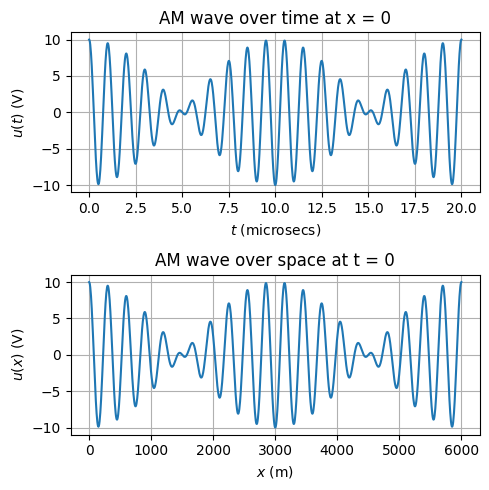

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
A = 10  # amplitude in volts

f = 1e6  # frequency in Hz (1 MHz)
v = 3e8  # phase velocity in m/s

# Time plot parameters
t = np.linspace(0, 20e-6, 1000)  # time from 0 to 20 microseconds

# Space plot parameters
x = np.linspace(0, 6e3, 1000)  # distance from 0 to 300 meters
t_fixed = 0  # t = 0

# Wave equations
def am_wave(A, f, v, t, x):
    omega = 2 * np.pi * f
    wavelength = v / f
    k = 2 * np.pi / wavelength
    omega_0 = omega/20
    k_0 = k/20
    return (A*np.cos(k_0 * x - omega_0 * t)) * np.cos(k * x - omega * t)

u_t = am_wave(A, f, v, t, 0)  # at x = 0
u_x = am_wave(A, f, v, 0, x)  # at t = 0

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(5, 5))

# Plot u as a function of t
axs[0].plot(1e6*t, u_t)
axs[0].set_title('AM wave over time at x = 0')
axs[0].set_xlabel('$t$ (microsecs)')
axs[0].set_ylabel('$u(t)$ (V)')
axs[0].grid(True)

# Plot u as a function of x
axs[1].plot(x, u_x)
axs[1].set_title('AM wave over space at t = 0')
axs[1].set_xlabel('$x$ (m)')
axs[1].set_ylabel('$u(x)$ (V)')
axs[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


### Task 2

Make an **animation** of the AM signal from Task 1.
Copy and adapt the code from the **Travelling wave animation**.

- The animator settings can remain the same.
- A timestep of 1e-7 seconds is recommended.
- The $x$-axis should span 10 km.

#### Answer

#### Solution

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Wave equation
def am_wave(A, f, v, t, x):
    omega = 2 * np.pi * f
    wavelength = v / f
    k = 2 * np.pi / wavelength
    omega_0 = omega/20
    k_0 = k/20
    return (A*np.cos(k_0 * x - omega_0 * t)) * np.cos(k * x - omega * t)


# Given parameters
A = 1  # amplitude in volts
f = 1e6  # frequency in Hz (1 MHz)
v = 3e8  # speed of the wave in m/s

# Set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()
x = np.linspace(0, 1e4, 1000)
line, = ax.plot(x/1e3, am_wave(A,f,v,0,x))

# Initialization function: plot the background to be used by each frame
def init():
    line.set_ydata(am_wave(A,f,v,0,x))
    ax.set_xlabel('Position (km)')
    ax.set_xlim(0, 1e1)
    ax.set_title('AM Radio Wave')
    ax.grid(True)
    return line,

# Animation function: this is called sequentially
def animate(i):
    t = i*1e-7
    line.set_ydata(am_wave(A,f,v,t,x))  # update the data
    return line,

# Call the animator.
ani = animation.FuncAnimation(fig, animate, init_func=init,
      frames=200, interval=20, blit=True)

# Save the animation as an MP4 file
ani.save('am_radiowave_animation.mp4', writer='ffmpeg')

plt.show()